# Homework Project for Day 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
!pip install flashtorch
!pip install barbar
from flashtorch.utils import apply_transforms
from flashtorch.saliency import Backprop
import itertools
from barbar import Bar

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-vum52kc3
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-vum52kc3
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7329 sha256=0e4f09a31e4704be6e3df46db3f2db81d870929520a0b7d5c38b1a9da9056861
  Stored in directory: /tmp/pip-ephem-wheel-cache-oab0c63b/wheels/81/51/4e/93fa1b6f290ba71f589593454d4d769f9baebd8c4c376822d9
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
  Created wheel for flashtorch: filename=flashtorch-0.1.3-py3-none-any.whl size=26246 sha256=4175317adf9624da8f2ae4b4043f05db327fd3d9555f306aa5e6196a210680ab
  Stored in directory: /root/.cache/pip/wheels/e8/bc/36/9ac3236719be1f1c6d1d758fc5e404410fe17027dd80d1d06d
Successfully built flashtorch


In [ ]:
# Create new folder on your google drive like below:

In [ ]:
os.chdir('/content/IRMAS-dataset')
data_dir = '/content/IRMAS-dataset'

In [ ]:
import os
import shutil
import random

validation_split = 0.2

dataset_home = "/content/IRMAS-dataset/"
original_home = "/content/drive/MyDrive/Junior-Year/ML/instrument_dataset/"
subdirs = os.listdir(original_home)

subdir_to_number = {"cel": "1",
                    "cla": "2",
                    "flu": "3",
                    "gac": "4",
                    "gel": "5",
                    "org": "6",
                    "pia": "7",
                    "sax": "8",
                    "tru": "9",
                    "vio": "10",
                    "voi": "11",}

os.makedirs(dataset_home)
for subset in ["train","valid"]:
  os.makedirs(os.path.join(dataset_home,subset))
  for subdir in subdirs:
    os.makedirs(os.path.join(dataset_home,subset,subdir_to_number[subdir]))

for subdir in subdirs:
  for file in os.listdir(os.path.join(original_home,subdir)):
    subset = "valid" if random.random() < validation_split else "train"
    shutil.copyfile(os.path.join(original_home,subdir,file), os.path.join(dataset_home,subset,subdir_to_number[subdir],file))

In [ ]:
!zip -r /content/IRMAS-dataset.zip /content/IRMAS-dataset

Streaming output truncated to the last 5000 lines.
  adding: content/IRMAS-dataset/train/8/sax615.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax530.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax562.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax376.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax610.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax429.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax444.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax625.png (deflated 4%)
  adding: content/IRMAS-dataset/train/8/sax547.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax355.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax46.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax467.png (deflated 3%)
  adding: content/IRMAS-dataset/train/8/sax512.png (deflated 2%)
  adding: content/IRMAS-dataset/train/8/sax91.png (deflated 4%)
  adding: content/IRMAS-dataset/train/8/s

In [ ]:
with open("IRMAS-labels.txt","w") as f:
  f.write("\n".join(list(sorted(subdirs))))

## Note for using this yourself

If you are going to run this yourself, you will need to create a folder on your google drive where you put all these things.  Let's call it "MyClassExer" (substitute whatever you like instead of "Flowers").  Within that folder you will need a folder called "train" and another folder called "valid" (don't change those names).  Within each of those folders, you should have folders called "1", "2", "3", etc.  One for each of the labels you want to use.  In each of <i>those</i> folders you should have the images you want to use for training.  I recommend at least 70 images per folder for the training and 20 or so for the validation.  More is better.

In the "MyClassExer" folder, you should have a text file called something like "MyLabels.txt".  This file should be something like this:

<pre>
'My Label One'
'My Label Two'
'My Label Three'
</pre>

There should be one line per label (and corresponding folders in "train" and "valid").  If you set all that up correctly, and change "Flowers" in the code to match "MyClassExer" (and other changes to match the file names), the rest of the code should work as intended (famous last words)...

In [ ]:
dataset_labels = pd.read_csv('IRMAS-labels.txt',header=None)[0]
print(np.shape(dataset_labels))
# There were 102 flower labels, but this should print out only 2 or 3, depending on how many labels you used.

(11,)


In [ ]:
#mean = torch.tensor([0.6243, 0.5446, 0.5001], dtype=torch.float64)
#std = torch.tensor([0.3239, 0.3117, 0.3055], dtype=torch.float64)

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  #Data Augmentation 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize(mean, std)
    ]),
}

# Note the images will be resized and cropped so they are all the same.  
# This means you can pick any images you want, but you should try to make sure
# that the thing you are actually trying to classify is near the center of 
# the image.

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes
# Make a note of these numbers and put them into your final report at the bottom

{'train': 5423, 'valid': 1282}

In [ ]:
def imshow(inp, title = " "):
    fig, ax = plt.subplots()
    inp = inp.numpy().transpose((1, 2, 0))
    #inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    plt.title(title, loc='center')
    # fig.set_size_inches(5, 5)
    plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


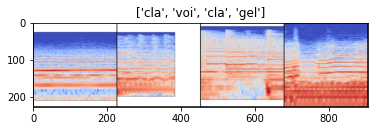

In [ ]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs[:4]
classes = classes[:4] 
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[dataset_labels[int(class_names[x])-1] for x in classes])

In [ ]:
def train_model(model, num_epochs=25):

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    for epoch in range(num_epochs):

        print('Epoch: ',epoch+1,'/',num_epochs)

        ###Train
        model.train() 
        running_corrects = 0
        for inputs, labels in Bar(dataloaders['train']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print("Train ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['train']))
        
        scheduler.step()
    
        ###Val
        model.eval()  
        running_corrects = 0
        for inputs, labels in Bar(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

        print("Valid ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['valid']))
        print("#######################")
    return model

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 11)

In [ ]:
model = train_model(model, num_epochs=20)
# Set this number to 20 or so at first.  Keep an eye on the outputs.  When you see overfitting starting, you can go ahead and kill the
# program right then.  Lower the number of epochs down to where the overfitting was just starting and then run it again.

Epoch:  1 / 20


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


5423/5423: [===============================>] - ETA 5.9s
Train  Acc: 0.28
1282/1282: [===============================>] - ETA 4.0s
Valid  Acc: 0.39
#######################
Epoch:  2 / 20
5423/5423: [===============================>] - ETA 6.1s
Train  Acc: 0.42
1282/1282: [===============================>] - ETA 3.2s
Valid  Acc: 0.49
#######################
Epoch:  3 / 20
5423/5423: [===============================>] - ETA 5.7s
Train  Acc: 0.46
1282/1282: [===============================>] - ETA 3.1s
Valid  Acc: 0.48
#######################
Epoch:  4 / 20
1088/5423: [======>.........................] - ETA 1513.4s

In [ ]:
def visualize_model(model, num_images=16):
    model.eval()
    index = 0
    for i, (inputs, labels) in enumerate(dataloaders['valid']):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        preds = torch.max(outputs, 1)[1]

        for j in range(inputs.size()[0]):
            index += 1
            title1 = 'predicted: ' + dataset_labels[int(class_names[preds[j]])-1] + '     class: ' + dataset_labels[int(class_names[labels[j]])-1]
            imshow(inputs.cpu().data[j],title1)

            if index == num_images:
                return

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


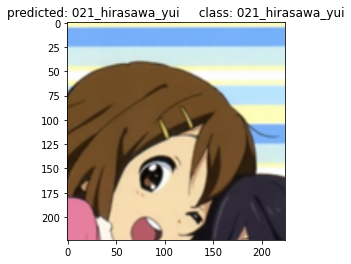

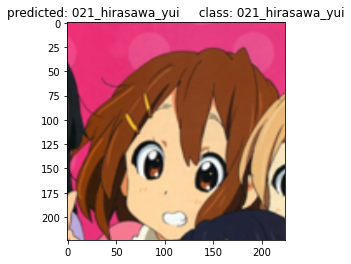

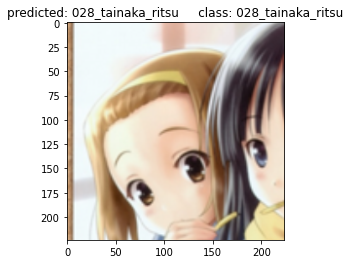

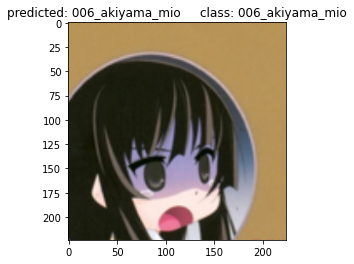

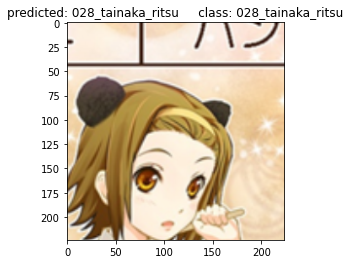

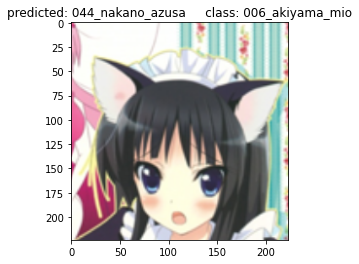

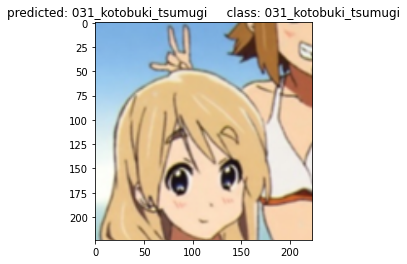

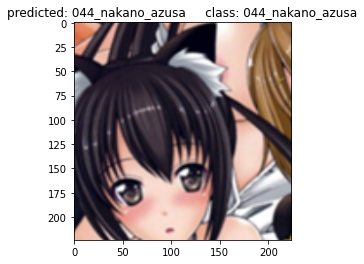

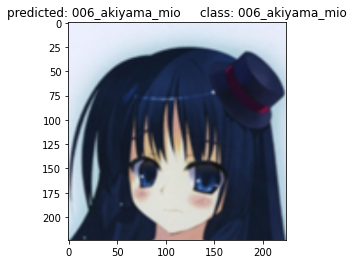

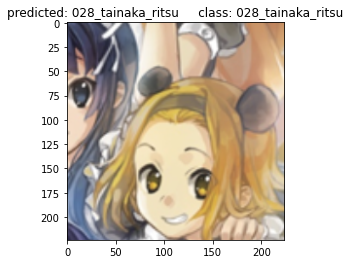

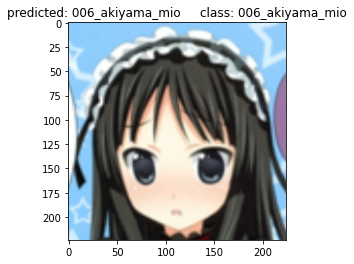

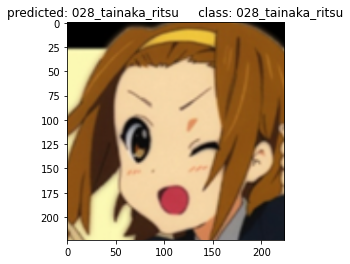

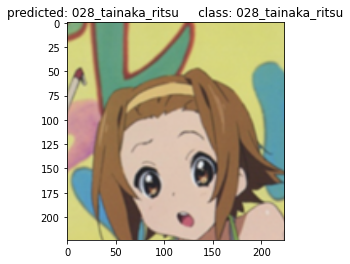

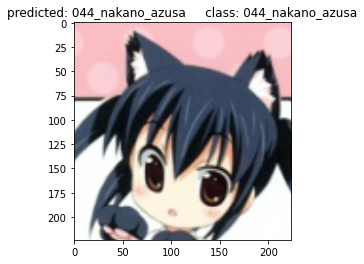

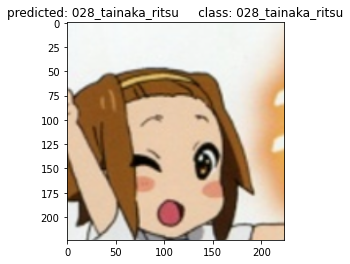

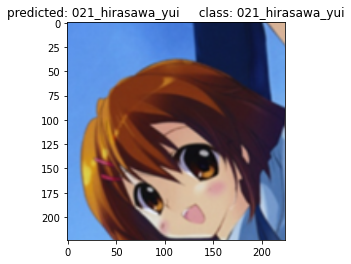

In [ ]:
visualize_model(model)
# See how well it does, and put that in your report.  Is the fraction it gets right here 
# close to the validation accuracy reported in training?

predicted: 044_nakano_azusa


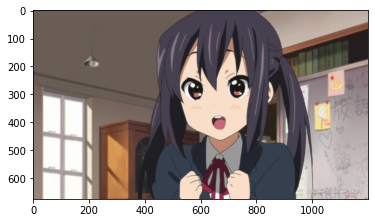

In [ ]:
# Now, find an image on the web that you want to try this on
image = io.imread('https://anibproductions.files.wordpress.com/2020/01/azusa-nakano.jpg?w=1200')
plt.imshow(image)
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

outputs = model(img)
preds = torch.max(outputs, 1)[1]

print('predicted: ' + dataset_labels[int(preds)])

predicted: 031_kotobuki_tsumugi


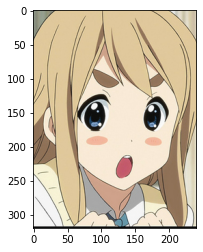

In [ ]:
# Now, find an image on the web that you want to try this on
image = io.imread('https://pbs.twimg.com/profile_images/1749360529/___.jpeg')
plt.imshow(image)
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

outputs = model(img)
preds = torch.max(outputs, 1)[1]

print('predicted: ' + dataset_labels[int(preds)])

predicted: 006_akiyama_mio


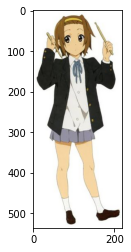

In [ ]:
# Now, find an image on the web that you want to try this on
image = io.imread('https://static.wikia.nocookie.net/poohadventures/images/4/47/Ritsu_Tainaka_anime.jpg/revision/latest/scale-to-width-down/220?cb=20200208165145')
plt.imshow(image)
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

outputs = model(img)
preds = torch.max(outputs, 1)[1]

print('predicted: ' + dataset_labels[int(preds)])

# Final report

{'train': 359, 'valid': 87}

The labels I chose were of the main cast from one of my favorite anime, K-On! I wanted to see if, even given fanart (i.e. images not from the original anime or manga), the machine would still be able to be accurate. While there wasn't a lot of testing, it seems that the model was surprisingly accurate. 

While not visible, the training loss likely kept decreasing while the validation loss decreased until epoch 3 when the model started overfitting. The training accuracy increased, plateauing around 0.98, but the validation accuracy increased only up until epoch 3, hitting 0.97; when originally training (for 20 epochs), the accuracy started going down later than epoch 2, so currently, the validation accuracy appears to have started going down after epoch 2. Again, the model's validation accuracy peaked at 0.97. 

The model did surprisingly well. Only about 1 in 20 images would be classified incorrectly. Given images that include the rest of the body (the model was trained with images of the face), I am not sure how the model would do, but in the example I tried, the model was wrong. However, if given a face, the model seems to do well. If this dataset were to be expanded, it could include figurines, or replacing the images of just the face with a full body.

I learned that the model can even be trained with images that we might consider to be distinctly different, but with similar patterns as well as the challenges of trying to create such a dataset: for example, some of these images include a little bit of other characters. Had I cropped a little more exactly, maybe there would not be a lot, but it was hard finding images of just the individual characters while still introducing some variation.